In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import sparse
import scipy

## Getting Hand Crafted Data as numpy array

In [2]:
data =np.array( [(4.5,13.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (15.5,6.5),
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )

In [3]:
np.shape(data)

(43, 2)

## Data Visualization

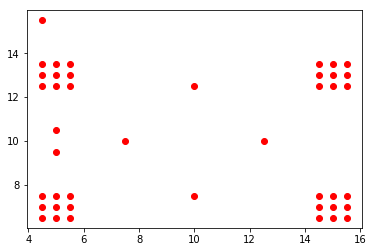

In [4]:
for el in data:
    #print(el)
    plt.plot(el[0],el[1],'ro')
plt.show()

In [5]:
from submodlib.functions.facilityLocation import FacilityLocationFunction

## Facility Location

There are two ways in which one can use Facility Location <br>
1) User provides data matrix <br>
2) User provides similarity matrix <br>

In either cases, user can specify the number of nearest neighbors to be considered.

Once the object has been created, we can invoke the following methods <br> 
a) **evaluate(X)**:It takes a sub-set of graound set and returns a score for the same. <br> 
More is the score, more representitive is X.

b) **marginalGain(X, item)**: It takes a sub-set of ground set along with an additional datapoint in ground set (that's not already in the sub-set). It returns a value which reveals the change in score 
if that extra datapoint is added to the sub-set.

c) **maximize(optimizer, budget, stopIfZeroGain, stopIfNegativeGain, verbosity)**: It takes optimizer <br> name and budget and returns the most representative datapoint indicies along with corrosponding <br> marginal gains.

### 1) User Provides data matrix
In this case, user doesn't need to bother about creation of similarity kernel. User can simply <br>
specify the similarity metric and the mode (dense/sparse/cluster) and the module will create the <br>
desired similarity matrix internally **(using C++ engine)** and use it.

Here, lets consider this case on given data with sparse mode and euclidean metric.

In [6]:
obj = FacilityLocationFunction(n=43, data=data, mode="sparse", metric="euclidean", num_neigh=10)
X = {0,1,5,3,8}
print(obj.evaluate(X))
X = {10,25}
print(obj.evaluate(X))
X = {0,1,5,3,8}
print(obj.marginalGain(X,10))

15.1635160446167
14.276329040527344
0.8380670547485352


[7, 25, 10, 28, 36, 41, 37, 38, 39, 40]


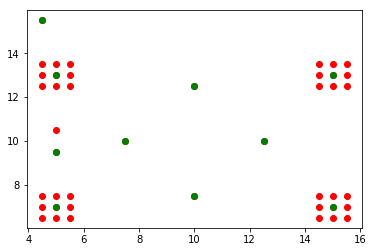

In [7]:
l = obj.maximize(10,'NaiveGreedy', False, False, False)
l_ind=[]
for el in l:
    l_ind.append(el[0])
print(l_ind)

for el in data:
    plt.plot(el[0],el[1],'ro')

for el in l_ind:
    k = data[el]
    plt.plot(k[0],k[1],'go')

plt.show()

### 2) User Provides similarity matrix
In this case, user can user the **Python helper function** to create a similarity matrix and provide <br>
the same to Facility Location.
Here, lets consider this case with same scenerio as before

In [8]:
from submodlib.helper import create_kernel
_, K_sparse = create_kernel(data, 'sparse','euclidean', num_neigh=10)
obj = FacilityLocationFunction(n=43, sijs = K_sparse, num_neigh=10)
X = {0,1,5,3,8}
print(obj.evaluate(X))
X = {10,25}
print(obj.evaluate(X))
X = {0,1,5,3,8}
print(obj.marginalGain(X,10))

15.1635160446167
14.276329040527344
0.8380670547485352


[13, 10, 25, 28, 37, 41, 1, 38, 39, 36]


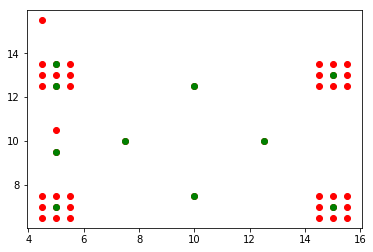

In [9]:
l = obj.maximize(10,'NaiveGreedy', False, False, False)
l_ind=[]
for el in l:
    l_ind.append(el[0])
print(l_ind)

for el in data:
    plt.plot(el[0],el[1],'ro')

for el in l_ind:
    k = data[el]
    plt.plot(k[0],k[1],'go')

plt.show()

###  Clustered mode
In this mode, user provedes data and specifies clustered mode as shown in the next cell.User can also <br> optionally specify no of clusters to be created. In this example, we are using 10 clusters.<br>

Note that metric parameter is only for similarity within the clusters, its not used during the creation of clusters. <br> Infact, for creation of clusters we have used scikit-learn's implementation of BIRCH which always <br> use Euclidean distance.<br>
https://scikit-learn.org/stable/modules/clustering.html#birch

In [10]:
obj = FacilityLocationFunction(n=43, data=data, mode="clustered", metric="euclidean", num_cluster=10)
X = {0,1,5,3,8}
print(obj.evaluate(X))
X = {10,25}
print(obj.evaluate(X))
X = {0,1,5,3,8}
print(obj.marginalGain(X,10))

14.247344970703125
13.847914695739746
0.6961570978164673


[7, 10, 25, 28, 41, 36, 37, 38, 39, 40]


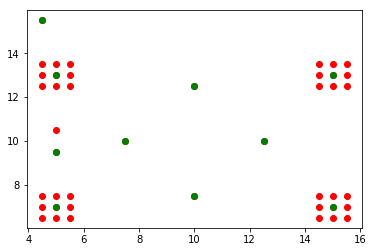

In [11]:
l = obj.maximize(10,'NaiveGreedy', False, False, False)
l_ind=[]
for el in l:
    l_ind.append(el[0])
print(l_ind)

for el in data:
    plt.plot(el[0],el[1],'ro')

for el in l_ind:
    k = data[el]
    plt.plot(k[0],k[1],'go')

plt.show()